## KNN Regression

Dataset link: https://www.kaggle.com/krishnabalanagu/slumptest


In [1]:
##import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r"F:\Priyanaka\Dataset\Slump.csv",header=0)
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cement    103 non-null    float64
 1   Slag      103 non-null    float64
 2   Fly ash   103 non-null    float64
 3   Water     103 non-null    float64
 4   SP        103 non-null    float64
 5   Coarse    103 non-null    float64
 6   Fine      103 non-null    float64
 7   SLUMP     103 non-null    float64
 8   FLOW      103 non-null    float64
 9   Strength  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.isnull().sum()

Cement      0
Slag        0
Fly ash     0
Water       0
SP          0
Coarse      0
Fine        0
SLUMP       0
FLOW        0
Strength    0
dtype: int64

In [6]:
## there is no missing value

In [7]:
print("The shape of data is = {}".format(df.shape))
print("The size of data is = {}".format(df.size))

The shape of data is = (103, 10)
The size of data is = 1030


In [8]:
df.dtypes

Cement      float64
Slag        float64
Fly ash     float64
Water       float64
SP          float64
Coarse      float64
Fine        float64
SLUMP       float64
FLOW        float64
Strength    float64
dtype: object

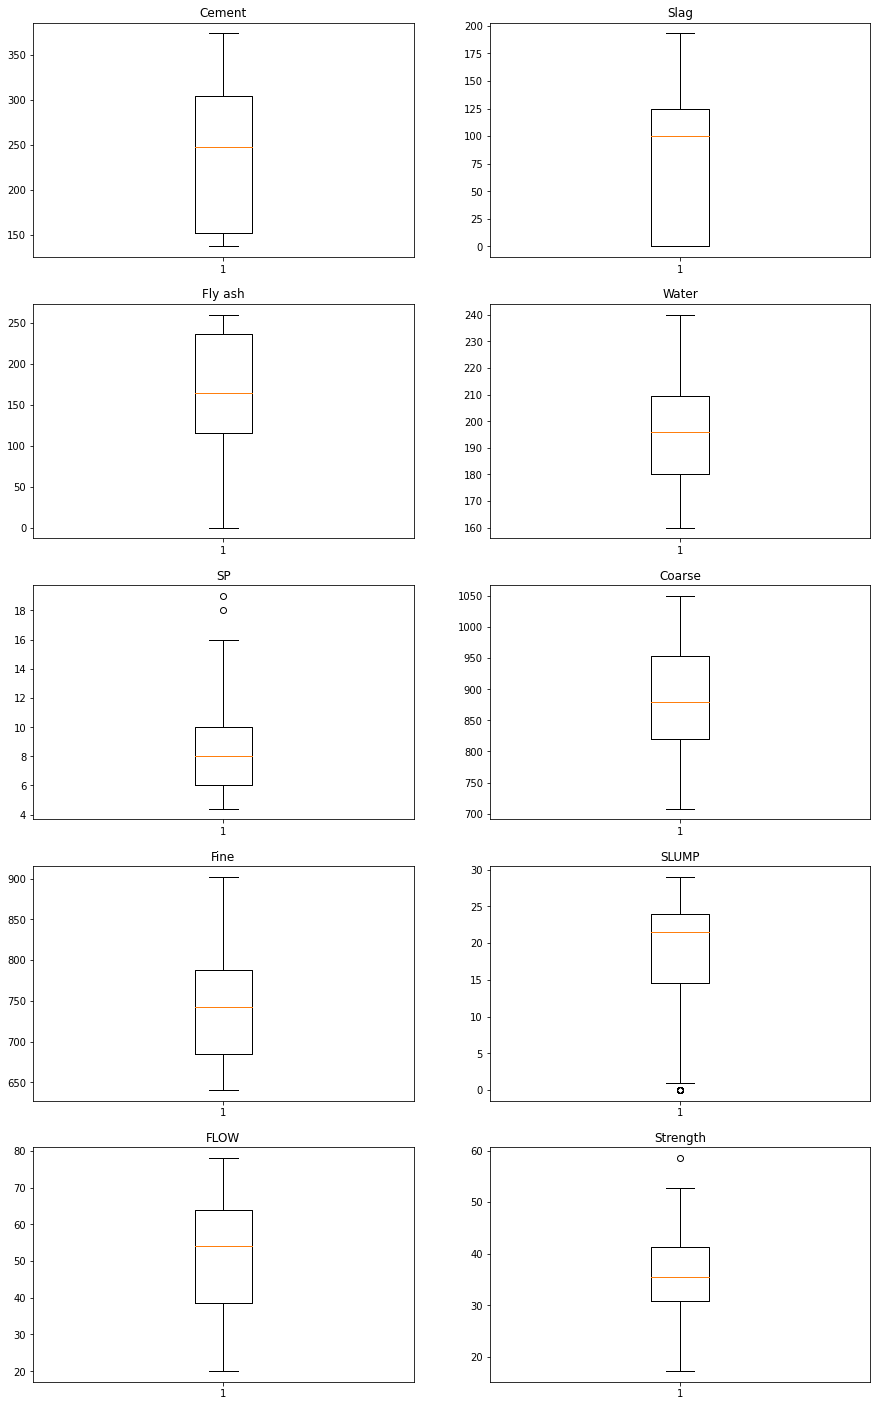

In [9]:
#checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(5,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1
        
plt.show()

In [10]:
##checking corrlation
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


In [11]:
##splitting in x and y
X = df.iloc[:,:-1].values
y=  df.iloc[:,-1].values

In [12]:
X.shape

(103, 9)

In [13]:
y.shape

(103,)

In [14]:
y = y.reshape(-1,1)

### feature scaling
Whenever we are dealing with KNN algorithm, we should do the feature scaling


In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [16]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

### Selecting the 'k' value such our mean square error is minimum

In [18]:
mse = []
r2  = []

for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))


## MSE v/s K-value

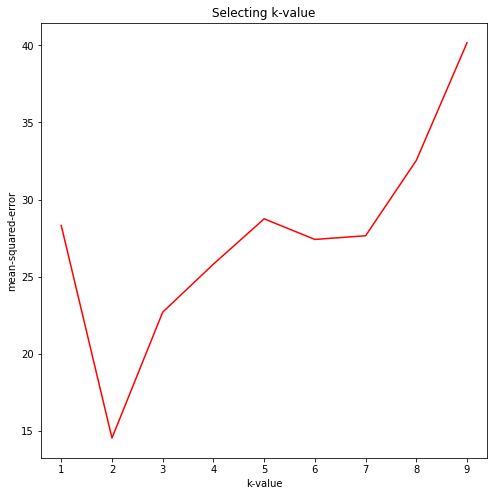

In [19]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

### As we can clearly see from the graph, for k =2 we have minimum MSE.

In [20]:
## Grid search
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

### model building

In [21]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### model evalution

In [22]:
r2_score(y_test,y_pred)

0.8028411170170824

In [23]:
mean_squared_error(y_test,y_pred)

14.549913095238097

In [24]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}